In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import math

In [2]:
spotify_data = pd.read_csv("spotify_data.csv")

In [3]:
spotify_data = spotify_data.drop_duplicates(subset=["artists", "name"])

In [4]:
spotify_data.groupby(["name", "artists"]).count()

,,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,artists,,,,,,,,,,,,,,,,,
!Que Vida! - Mono Version,['Love'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""40""",['U2'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""40"" - Live",['U2'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""40"" - Remastered 2008",['U2'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"""45""",['The Gaslight Anthem'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
텅 빈 마음 Empty Heart,['LEE SEUNG HWAN'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
피카부 Peek-A-Boo,['Red Velvet'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
행복 (Happiness),['Red Velvet'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
spotify_data.groupby(["year"])["name"].count()

year
1921     116
1922      70
1923     160
1924     227
1925     239
        ... 
2016    1894
2017    1926
2018    1928
2019    1916
2020    1571
Name: name, Length: 100, dtype: int64

In [6]:
spotify_data.groupby(["name"])["artists"].count().sort_values(ascending=False).head(15)

name
Summertime         51
Home               37
Overture           32
You                32
Stay               30
Forever            30
Paradise           29
Runaway            27
I Love You         27
Stardust           27
Angel              27
Smile              26
Hold On            26
Time After Time    25
Goodbye            25
Name: artists, dtype: int64

In [7]:
summertime_table = spotify_data[spotify_data["name"] == "Summertime"]

In [8]:
summertime_table.groupby(["year"])["artists"].count().sort_values(ascending=False).head(15)

year
1959    6
1958    4
1955    3
1960    3
1973    2
1957    2
1965    2
1997    2
1935    2
2010    2
1949    1
1954    1
1963    1
1956    1
1937    1
Name: artists, dtype: int64

## TODO: remove duplicates - duplicate is when one artist with the same song repeats multiple times (drop_duplicates)

describe conclusion
    

In [9]:
spotify_data[spotify_data["popularity"] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163205,0.841,['Philippe Gerard'],0.545,590467,0.2370,0,0tzUood6mLJDslr4aYZG8l,0.000000,7,0.3770,-19.395,0,Les Nourritures Terrestres,0,1953,0.9140,70.053,0.4300,1953
163206,0.966,"[""Lilly's Chapel School (Ala.)""]",0.649,53080,0.5750,0,0tzh7fBzf3ivibkXkMXeIr,0.001830,0,0.8760,-14.621,1,Bob a Needle,0,1953-01-01,0.6120,125.271,0.4080,1953
163207,0.504,"['Franz Lehár', 'Anton Niessner/Emmy Loose/Phi...",0.648,20293,0.0814,0,0u3Y8w2Pur3vpnH9XJcNxF,0.000000,7,0.2430,-32.456,1,"Die Lustige Witwe (2001 - Remaster), Act II: D...",0,1953,0.7260,135.027,0.8980,1953
169825,0.913,['ROSALÍA'],0.698,253109,0.2900,0,2H60EiDMGTnzer2D8I6DMv,0.000021,4,0.0950,-6.899,0,Aunque Es De Noche,0,2020-06-05,0.0510,137.949,0.3980,2020


In [10]:
correlation_table = spotify_data[[
    "acousticness", 
    "danceability",
    "duration_ms",
    "energy",
    "explicit",
    "instrumentalness",
    "key",
    "liveness",
    "mode",
    "popularity",
    "speechiness",
    "tempo",
    "valence",
    "year"
]].corr()

In [11]:
correlation_table.style.background_gradient(cmap='Blues')

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.262456,-0.078190,-0.747438,-0.256961,0.328865,-0.022233,-0.023526,0.048380,-0.588654,-0.055407,-0.204868,-0.177028,-0.619240
danceability,-0.262456,1.000000,-0.135057,0.215910,0.246059,-0.278631,0.023093,-0.105063,-0.046248,0.212250,0.229487,-0.004502,0.558774,0.194340
duration_ms,-0.078190,-0.135057,1.000000,0.036531,-0.046983,0.083255,-0.001693,0.035093,-0.044907,0.066044,-0.059630,-0.027563,-0.197492,0.079701
energy,-0.747438,0.215910,0.036531,1.000000,0.140000,-0.280481,0.030921,0.126223,-0.039953,0.492356,-0.052909,0.249378,0.343751,0.526638
explicit,-0.256961,0.246059,-0.046983,0.140000,1.000000,-0.141001,0.007156,0.039018,-0.082724,0.214414,0.414800,0.012375,-0.022033,0.241780
instrumentalness,0.328865,-0.278631,0.083255,-0.280481,-0.141001,1.000000,-0.015134,-0.049820,-0.034334,-0.285700,-0.119072,-0.105331,-0.187822,-0.278362
key,-0.022233,0.023093,-0.001693,0.030921,0.007156,-0.015134,1.000000,0.000039,-0.114131,0.011482,0.014769,0.002807,0.029277,0.012281
liveness,-0.023526,-0.105063,0.035093,0.126223,0.039018,-0.049820,0.000039,1.000000,0.005317,-0.077817,0.149393,0.007147,-0.000314,-0.059313
mode,0.048380,-0.046248,-0.044907,-0.039953,-0.082724,-0.034334,-0.114131,0.005317,1.000000,-0.035359,-0.057175,0.013156,0.012295,-0.034011
popularity,-0.588654,0.212250,0.066044,0.492356,0.214414,-0.285700,0.011482,-0.077817,-0.035359,1.000000,-0.143539,0.134060,-0.006373,0.887291


In [12]:
spotify_data.groupby(["year"])["artists"].count().sort_values(ascending=True).head(50)

year
1922      70
1921     116
1923     160
1924     227
1925     239
1932     469
1933     489
1937     508
1934     541
1938     549
1927     569
1931     614
1943     619
1944     761
1926     805
1941     873
1929     903
1939     911
1928     924
1936     934
1946    1388
1942    1504
1947    1512
1935    1527
2020    1571
1948    1596
1930    1707
1973    1746
1976    1776
1977    1782
1970    1782
1971    1783
1972    1785
1985    1789
2002    1791
2012    1797
1979    1803
2009    1805
2004    1806
1945    1808
1987    1811
1967    1812
2007    1812
1994    1813
1991    1813
1969    1814
1984    1818
1959    1819
1988    1819
2008    1820
Name: artists, dtype: int64

In [13]:
spotify_after_2000_data = spotify_data[spotify_data["year"] >= 2000]

In [14]:
spotify_after_2000_data = spotify_after_2000_data[[
    "acousticness", 
    "danceability",
    "duration_ms",
    "energy",
    "explicit",
    "instrumentalness",
    "key",
    "liveness",
    "mode",
    "popularity",
    "speechiness",
    "tempo",
    "valence",
    "year"
]]

In [15]:
spotify_after_2000_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year
6054,0.97200,0.567,313293,0.227,0,0.601000,10,0.1100,1,47,0.0290,136.123,0.0396,2000
6055,0.32100,0.821,360240,0.418,0,0.000372,9,0.2220,0,51,0.0407,117.382,0.8030,2000
6056,0.00659,0.706,202507,0.602,1,0.000138,11,0.4000,0,44,0.3420,89.692,0.4790,2000
6057,0.00390,0.368,173360,0.977,0,0.000000,11,0.3500,0,52,0.1270,165.889,0.5480,2000
6058,0.12200,0.501,344200,0.511,0,0.000000,7,0.2790,0,53,0.0291,78.045,0.1130,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.21000,0.795,218501,0.585,0,0.000001,8,0.1120,1,68,0.0374,97.479,0.9340,2020
169904,0.17300,0.875,163800,0.443,1,0.000032,1,0.0891,1,75,0.1430,100.012,0.3060,2020
169905,0.01670,0.719,167468,0.385,0,0.031300,8,0.1110,1,64,0.0403,128.000,0.2700,2020
169906,0.53800,0.514,180700,0.539,0,0.002330,7,0.1080,1,70,0.1050,123.700,0.1530,2020


In [16]:
def convert(number):
    return round(number/10)

In [17]:
spotify_after_2000_data["popularity_simplified"] = convert(spotify_after_2000_data["popularity"])

In [18]:
spotify_after_2000_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year,popularity_simplified
6054,0.97200,0.567,313293,0.227,0,0.601000,10,0.1100,1,47,0.0290,136.123,0.0396,2000,5.0
6055,0.32100,0.821,360240,0.418,0,0.000372,9,0.2220,0,51,0.0407,117.382,0.8030,2000,5.0
6056,0.00659,0.706,202507,0.602,1,0.000138,11,0.4000,0,44,0.3420,89.692,0.4790,2000,4.0
6057,0.00390,0.368,173360,0.977,0,0.000000,11,0.3500,0,52,0.1270,165.889,0.5480,2000,5.0
6058,0.12200,0.501,344200,0.511,0,0.000000,7,0.2790,0,53,0.0291,78.045,0.1130,2000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.21000,0.795,218501,0.585,0,0.000001,8,0.1120,1,68,0.0374,97.479,0.9340,2020,7.0
169904,0.17300,0.875,163800,0.443,1,0.000032,1,0.0891,1,75,0.1430,100.012,0.3060,2020,8.0
169905,0.01670,0.719,167468,0.385,0,0.031300,8,0.1110,1,64,0.0403,128.000,0.2700,2020,6.0
169906,0.53800,0.514,180700,0.539,0,0.002330,7,0.1080,1,70,0.1050,123.700,0.1530,2020,7.0


In [19]:
y = spotify_after_2000_data["popularity_simplified"]
X = spotify_after_2000_data[["energy", "explicit", "danceability"]]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.95
, random_state=100)

### Random Forest 

In [20]:
random_forest_model = RandomForestClassifier(n_estimators=1000, max_features=None, n_jobs=4, min_samples_leaf=300,
                                           min_samples_split=2)

In [21]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=300,
                       n_estimators=1000, n_jobs=4)

In [22]:
random_forest_model.score(X_test, y_test)

0.3378946793401071

### Logistic Regression

In [23]:
logistic_regression_model = LogisticRegression(max_iter=100, n_jobs=4, C=5, fit_intercept=False, warm_start=True)

In [24]:
logistic_regression_model.fit(X_train, y_train.ravel())

LogisticRegression(C=5, fit_intercept=False, n_jobs=4, warm_start=True)

In [25]:
logistic_regression_model.score(X_test, y_test)

0.33565497651043374

# Linear Regression

In [26]:
linear_regression_model = LinearRegression()

In [27]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
linear_regression_model.score(X_test, y_test)

0.04159804739645445

In [29]:
spotify_after_2000_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year,popularity_simplified
6054,0.97200,0.567,313293,0.227,0,0.601000,10,0.1100,1,47,0.0290,136.123,0.0396,2000,5.0
6055,0.32100,0.821,360240,0.418,0,0.000372,9,0.2220,0,51,0.0407,117.382,0.8030,2000,5.0
6056,0.00659,0.706,202507,0.602,1,0.000138,11,0.4000,0,44,0.3420,89.692,0.4790,2000,4.0
6057,0.00390,0.368,173360,0.977,0,0.000000,11,0.3500,0,52,0.1270,165.889,0.5480,2000,5.0
6058,0.12200,0.501,344200,0.511,0,0.000000,7,0.2790,0,53,0.0291,78.045,0.1130,2000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.21000,0.795,218501,0.585,0,0.000001,8,0.1120,1,68,0.0374,97.479,0.9340,2020,7.0
169904,0.17300,0.875,163800,0.443,1,0.000032,1,0.0891,1,75,0.1430,100.012,0.3060,2020,8.0
169905,0.01670,0.719,167468,0.385,0,0.031300,8,0.1110,1,64,0.0403,128.000,0.2700,2020,6.0
169906,0.53800,0.514,180700,0.539,0,0.002330,7,0.1080,1,70,0.1050,123.700,0.1530,2020,7.0


<AxesSubplot:xlabel='popularity', ylabel='energy'>

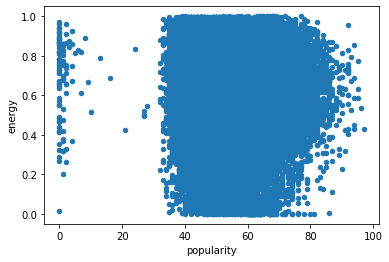

In [75]:
spotify_after_2000_data.plot.scatter(y="energy", x="popularity")

<AxesSubplot:xlabel='explicit'>

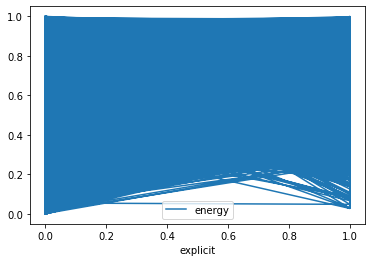

In [82]:
spotify_after_2000_data.plot(x="explicit", y="energy")

<AxesSubplot:xlabel='year', ylabel='popularity'>

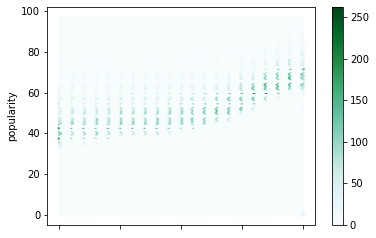

In [40]:
spotify_after_2000_data.plot.hexbin(x="year", y="popularity")

<AxesSubplot:>

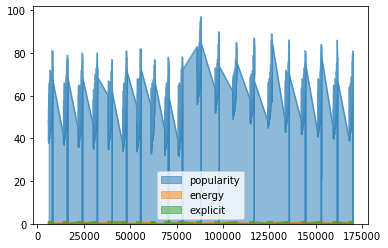

In [85]:
spotify_after_2000_data[["popularity","energy", "explicit"]].plot.area(stacked=False)

## Popularity clearly rises in correlation to the year of the song's release
### Therefore data cannot be deemed as trustworthy for actual results
### Data is also highly uneven and certain results are outright false